## Load data and fd

In [102]:
%load_ext autoreload
%autoreload 2
%cd /mnt/c/Users/resha/Documents/Github/balancing_framework/

from gluonts.dataset.repository import get_dataset, dataset_names
from gluonts.dataset.util import to_pandas

import pickle
import pandas as pd
import numpy as np
import json
import time
import argparse
from tqdm import tqdm

from framework import run_measurements, viz
from fracdiff import frac_diff_bestd
from monash_data_utils import convert_tsf_to_dataframe, monash_df_to_gluonts_train_datasets
import os


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/mnt/c/Users/resha/Documents/Github/balancing_framework


In [107]:

# print(f"Available datasets: {dataset_names}")
dataset = None
monash_dir = "monash_data"
series_num = -1

# dataset_name = 'london_smart_meters_without_missing' # m4_daily_dataset ; london_smart_meters_without_missing
# series_to_pull = 867 # m4, 1165 ; london, 1610 867
dataset_name = 'm4_daily_dataset' # m4_daily_dataset ; london_smart_meters_without_missing
series_to_pull = 1165 # m4, 1165 ; london, 1610 867

if os.path.exists(f"{monash_dir}/{dataset_name}.tsf"):
    loaded_data, frequency, forecast_horizon, contain_missing_values, contain_equal_length = convert_tsf_to_dataframe(f"{monash_dir}/{dataset_name}.tsf")
    if forecast_horizon is None: forecast_horizon = 24
    dataset = monash_df_to_gluonts_train_datasets(loaded_data, frequency, forecast_horizon)

if dataset is None:
    if dataset_name in dataset_names:
        dataset = get_dataset(dataset_name)
    else:
        raise ValueError(f"Dataset {dataset_name} not found in gluonts availables or local monash files.")

for entry in tqdm(dataset.test):
    series_num += 1
    if series_num > series_to_pull:
        break
    if series_num != series_to_pull:
        continue
    row = pd.Series(entry['target'])


 28%|██▊       | 1166/4227 [00:00<00:00, 774557.88it/s]


In [108]:
m4_row = row.copy()

In [22]:
df_fd, fd_change_pct = frac_diff_bestd(row.to_frame() )
df_fd.dropna(inplace=True)
df_fd.reset_index(drop=True, inplace=True)

0
0 d=0.0 stat windows =0 out of 1 p-values = [0.40475490833834854]
0 d=0.05 stat windows =0 out of 1 p-values = [0.13221371013333116]
0 d=0.1 stat windows =1 out of 1 p-values = [0.012780982871069236]
0 stationary with d=0.1 thresh=ignored stat windows =1 out of 1 p-values = [0.012780982871069236]
changed 1 out of 1 columns; 100.0%


In [24]:
df_fd.rename(columns={0: 'values_fd'}, inplace=True)
df_fd['values_o'] = m4_row
df_fd

,values_fd,values_o
0,7324.399902,7324.399902
1,6469.260205,7201.700195
2,6146.631887,7196.399902
3,5924.538104,7177.000000
4,5742.473234,7140.600098
...,...,...
8528,3376.790931,8862.099609
8529,3365.813556,8849.799805
8530,3389.219117,8870.599609
8531,3399.557134,8881.299805


In [25]:
df_fd.to_csv('m4_1165_fd.csv', index=False)

In [109]:
df_fd, fd_change_pct, fd_params = frac_diff_bestd(row.to_frame(), type='ffd' )
df_fd.dropna(inplace=True)
df_fd.reset_index(drop=True, inplace=True)

0
0 d=0.0 stat windows =0 out of 1 p-values = [0.40475490833834854]
0 d=0.05 stat windows =0 out of 1 p-values = [0.40082197207465353]
0 d=0.1 stat windows =0 out of 1 p-values = [0.39823861401453714]
0 d=0.15000000000000002 stat windows =0 out of 1 p-values = [0.3975589694347825]
0 d=0.2 stat windows =0 out of 1 p-values = [0.3979738138363143]
0 d=0.25 stat windows =0 out of 1 p-values = [0.39846188760191503]
0 d=0.30000000000000004 stat windows =0 out of 1 p-values = [0.3979175069825597]
0 d=0.35000000000000003 stat windows =0 out of 1 p-values = [0.39517089647864045]
0 d=0.4 stat windows =0 out of 1 p-values = [0.3933139352992462]
0 d=0.45 stat windows =0 out of 1 p-values = [0.3829194495851823]
0 d=0.5 stat windows =0 out of 1 p-values = [0.3770349189667393]
0 d=0.55 stat windows =0 out of 1 p-values = [0.37109195264044437]
0 d=0.6000000000000001 stat windows =0 out of 1 p-values = [0.3372671132572853]
0 d=0.65 stat windows =0 out of 1 p-values = [0.3226930071005992]
0 d=0.70000000

In [110]:
fd_params

{'col': (0.9500000000000001, 0.01)}

In [111]:
df_fd.rename(columns={0: 'values_fd'}, inplace=True)
df_fd['values_o'] = row
df_fd

,values_fd,values_o
0,180.830219,7324.399902
1,169.379713,7201.700195
2,151.535600,7196.399902
3,51.476157,7177.000000
4,209.385943,7140.600098
...,...,...
8526,247.116873,8860.099609
8527,220.691292,8846.900391
8528,252.814929,8862.099609
8529,244.047430,8849.799805


In [113]:
df_fd.to_csv('m4_1165_ffd.csv', index=False)

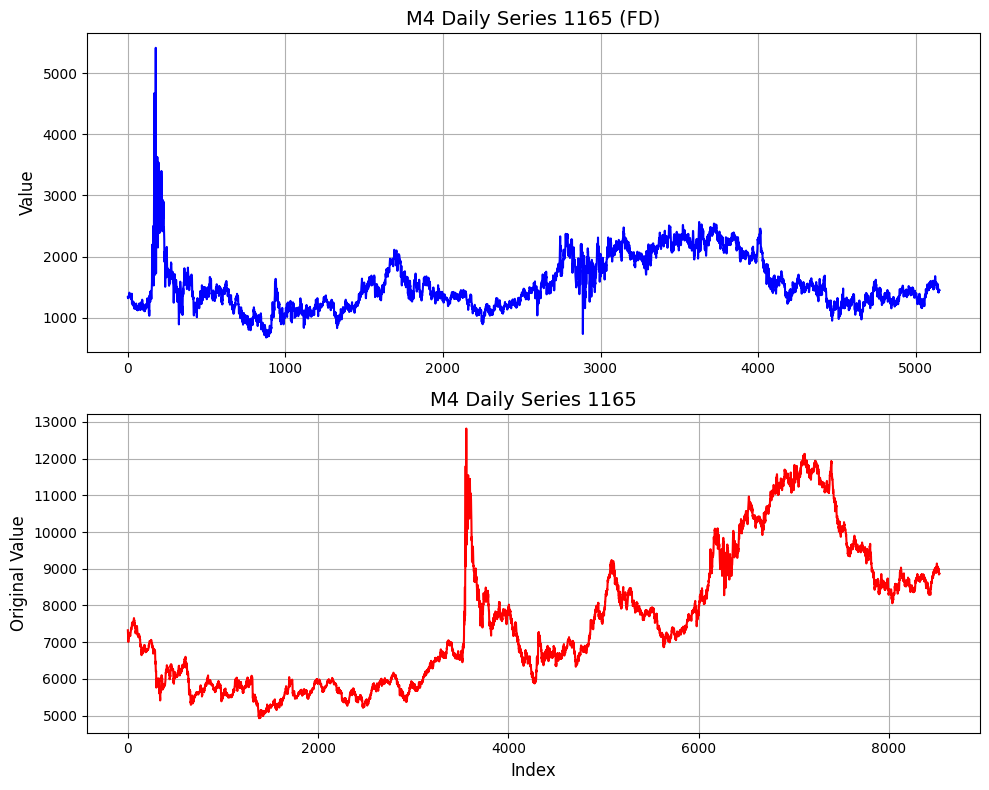

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a figure with two subplots, arranged vertically
# The sharex=True argument ensures both plots share the same x-axis for easier comparison
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=False)

# Plot the first series on the top subplot (ax1)
ax1.plot(df_fd[0],color='b')
ax1.set_title('M4 Daily Series 1165 (FD)', fontsize=14)
ax1.set_ylabel('Value', fontsize=12)
ax1.grid(True)

# Plot the second series on the bottom subplot (ax2)
ax2.plot(m4_row, color='r')
ax2.set_title('M4 Daily Series 1165', fontsize=14)
ax2.set_xlabel('Index', fontsize=12)
ax2.set_ylabel('Original Value', fontsize=12)
ax2.grid(True)

# Adjust the layout to prevent titles and labels from overlapping
plt.tight_layout()
# plt.savefig(f'compare_series.png')

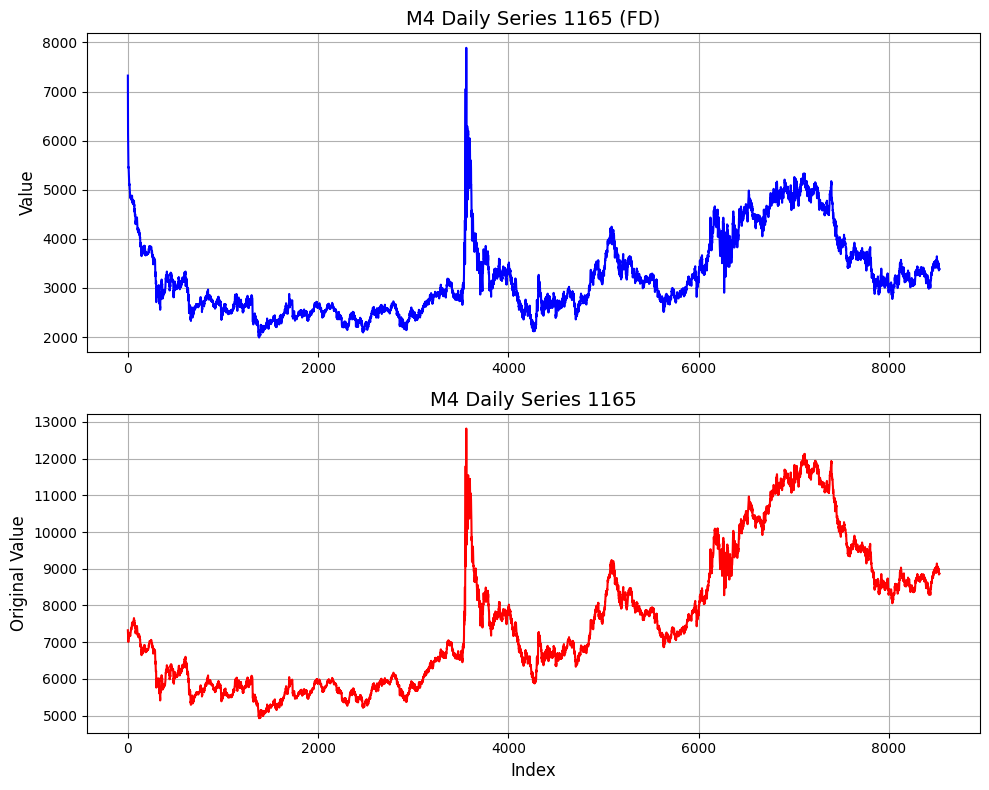

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a figure with two subplots, arranged vertically
# The sharex=True argument ensures both plots share the same x-axis for easier comparison
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=False)

# Plot the first series on the top subplot (ax1)
ax1.plot(df_fd[0],color='b')
ax1.set_title('M4 Daily Series 1165 (FD)', fontsize=14)
ax1.set_ylabel('Value', fontsize=12)
ax1.grid(True)

# Plot the second series on the bottom subplot (ax2)
ax2.plot(m4_row, color='r')
ax2.set_title('M4 Daily Series 1165', fontsize=14)
ax2.set_xlabel('Index', fontsize=12)
ax2.set_ylabel('Original Value', fontsize=12)
ax2.grid(True)

# Adjust the layout to prevent titles and labels from overlapping
plt.tight_layout()
# plt.savefig(f'compare_series.png')

In [16]:
df_fd

,0
0,7324.399902
1,6469.260205
2,6146.631887
3,5924.538104
4,5742.473234
...,...
8528,3376.790931
8529,3365.813556
8530,3389.219117
8531,3399.557134


In [ ]:
df = df_fd.copy()
df.rename(columns={0:'fd'}, inplace=True)
df['values_o'] = m4_row[-df.shape[0]:]
df.to_csv('m4_1165.csv', index=False)

## Invert

In [2]:
df = pd.read_csv('m4_1165_fd.csv')

In [ ]:
def get_weights(diff_amt, size):
    # The algorithm below executes the iterative estimation (section 5.4.2, page 78)
    weights = [1.]  # create an empty list and initialize the first element with 1.
    for k in range(1, size):
        weights_ = -weights[-1] * (diff_amt - k + 1) / k  # compute the next weight
        weights.append(weights_)

    # Now, reverse the list, convert into a numpy column vector
    # reverse so that later on we can slice the last n elements and keep the order w_-n ... -d, 1 
    # for applying against the series slice in the same past to present order
    # its 'reverse' in this case because the weights are computed from present to past order
    weights = np.array(weights[::-1]).reshape(-1, 1)
    return weights

def frac_diff(series, diff_amt, thresh=0.01):
    # 1. Compute weights for the longest series
    weights = get_weights(diff_amt, series.shape[0])
    skip = 0

    # 3. Apply weights to values
    output_df = {}
    for name in series.columns:
        series_f = series[[name]].fillna(method='ffill').dropna()
        output_df_ = pd.Series(index=series.index, dtype='float64')

        for iloc in range(skip, series_f.shape[0]):
            loc = series_f.index[iloc]

            # At this point all entries are non-NAs so no need for the following check
            # if np.isfinite(series.loc[loc, name]):
            output_df_[loc] = np.dot(weights[-(iloc + 1):, :].T, series_f.loc[:loc])[0, 0] # remember pd loc is end-inclusive unlike pd iloc, so :loc matches shape of the iloc + 1 slice and iloc=loc+1

        output_df[name] = output_df_.copy(deep=True)
    output_df = pd.concat(output_df, axis=1)
    return output_df



In [5]:
weights = get_weights(0.1, len(df))

In [ ]:
a = weights[-5:].T
b = df['values_o'].loc[:4]
c = np.dot(a[0], b)

5742.473135000001

In [40]:
b_last = (c - np.dot(a[0][:-1], b[:-1])) / a[0][-1]
b_last

7140.6

In [ ]:
new_fd_series = df['values_fd'].loc[:8]
original_series = df['values_o'].loc[:4]
weights = get_weights(0.1, len(new_fd_series))


In [95]:
def invert_fd(new_fd_series, original_series, d):
    # frac diff iteratively appies the most recent n weights to the n values of the series so far to produce the transformed series
    # so to reverse it, we cant reverse the entire dot product operation of the final series, but can iteratively solve for one unknown, the newest unfracdiffed value
    # for that, we subtract the dot product of the previous values from the current frac diff value, and divide by the current weight
    # i.e. if a = weights where len(weights) = n+1 and n is the length of the known original series
    # b = original_series of length n
    # c = frac diff series of length n+1 including the new to be inverted value
    # then the new value to be added to b = (c - np.dot(a[:-1], b[:-1])) / a[-1] 
    # or (the current frac diff value - the 1 less than complete frac diff calculation for this current value) / the current weight
    # and the current weight will always be 1 as the first in that series
    weights = get_weights(d, len(new_fd_series))
    new_unfd_series = original_series.copy()
    for i in range(len(original_series), len(new_fd_series)):
        # new_unfd_series will have all known values so far up to i-1 as the index of the final inverted series
        # the slice of the weights for the incomplete calc would be the last len(new_unfd_series) weights + 1 to shift back for the current weight we divide by, which is always 1
        new_unfd_series.loc[i] = (new_fd_series.loc[i] - np.dot(weights[-(len(new_unfd_series)+1):-1, :].T, new_unfd_series))[0]
    return new_unfd_series

# Debugging ffd

In [3]:
df = pd.read_csv('m4_1165_fd.csv')

In [4]:
def get_weights(diff_amt, size):
    # The algorithm below executes the iterative estimation (section 5.4.2, page 78)
    weights = [1.]  # create an empty list and initialize the first element with 1.
    for k in range(1, size):
        weights_ = -weights[-1] * (diff_amt - k + 1) / k  # compute the next weight
        weights.append(weights_)

    # Now, reverse the list, convert into a numpy column vector
    # reverse so that later on we can slice the last n elements and keep the order w_-n ... -d, 1 
    # for applying against the series slice in the same past to present order
    # its 'reverse' in this case because the weights are computed from present to past order
    weights = np.array(weights[::-1]).reshape(-1, 1)
    return weights

def frac_diff(series, diff_amt, thresh=0.01):
    # 1. Compute weights for the longest series
    weights = get_weights(diff_amt, series.shape[0])
    skip = 0

    # 3. Apply weights to values
    output_df = {}
    for name in series.columns:
        series_f = series[[name]].fillna(method='ffill').dropna()
        output_df_ = pd.Series(index=series.index, dtype='float64')

        for iloc in range(skip, series_f.shape[0]):
            loc = series_f.index[iloc]

            # At this point all entries are non-NAs so no need for the following check
            # if np.isfinite(series.loc[loc, name]):
            output_df_[loc] = np.dot(weights[-(iloc + 1):, :].T, series_f.loc[:loc])[0, 0] # remember pd loc is end-inclusive unlike pd iloc, so :loc matches shape of the iloc + 1 slice and iloc=loc+1

        output_df[name] = output_df_.copy(deep=True)
    output_df = pd.concat(output_df, axis=1)
    return output_df
def get_weights_ffd(diff_amt, thresh, lim):
    weights = [1.]
    k = 1

    # The algorithm below executes the iterativetive estimation (section 5.4.2, page 78)
    # The output weights array is of the indicated length (specified by lim)
    ctr = 0
    while True:
        # compute the next weight
        weights_ = -weights[-1] * (diff_amt - k + 1) / k

        if abs(weights_) < thresh:
            break

        weights.append(weights_)
        k += 1
        ctr += 1
        if ctr == lim - 1:  # if we have reached the size limit, exit the loop
            break

    # Now, reverse the list, convert into a numpy column vector
    weights = np.array(weights[::-1]).reshape(-1, 1)
    return weights

def frac_diff_ffd(series, diff_amt, thresh=1e-5):

    # 1) Compute weights for the longest series
    weights = get_weights_ffd(diff_amt, thresh, series.shape[0])
    width = len(weights) - 1

    # 2) Apply weights to values
    # 2.1) Start by creating a dictionary to hold all the fractionally differenced series
    output_df = {}

    # 2.2) compute fractionally differenced series for each stock
    for name in series.columns:
        series_f = series[[name]].fillna(method='ffill').dropna()
        temp_df_ = pd.Series(index=series.index, dtype='float64')
        for iloc1 in range(width, series_f.shape[0]):
            loc0 = series_f.index[iloc1 - width]
            loc1 = series.index[iloc1]

            # At this point all entries are non-NAs, hence no need for the following check
            # if np.isfinite(series.loc[loc1, name]):
            temp_df_[loc1] = np.dot(weights.T, series_f.loc[loc0:loc1])[0, 0]

        output_df[name] = temp_df_.copy(deep=True)

    # transform the dictionary into a data frame
    output_df = pd.concat(output_df, axis=1)
    return output_df


from statsmodels.tsa.stattools import adfuller
def set_thresh(series, diff_amt, max_rows_removed_ratio):
    thresh = 0.01  # start with a relatively large thresh value
    print(f"Trying thresh {thresh} for d={diff_amt} with max rows removed ratio {max_rows_removed_ratio}")
    while True:
        weights =  get_weights_ffd(diff_amt, thresh, len(series)) # get_weights_ffd(diff_amt, thresh, len(series))
        rows_removed = len(weights) - 1
        print(f"thresh {thresh} results in {rows_removed} rows removed, ratio {rows_removed/len(series)}")
        if rows_removed / len(series) <= max_rows_removed_ratio:
            break
        thresh /= 2  # decrease thresh
    return thresh
def frac_diff_bestd(df):
    d_tests = np.arange(0,1,0.05)
    changed = 0
    # for col in tqdm(df.columns): # more verbose
    for col in df.columns:
        print(col)
        if df[col].nunique()==1:
            print(f'{col} has only one unique value: {df[col].iloc[0]}')
            continue
        for d in d_tests:
            thresh = set_thresh(df[col], d, max_rows_removed_ratio=0.25) # using this leads to significantly different results, but test with it more if the dropped rows becomes a problem again
            frac_diff_test = frac_diff_ffd(df[[col]], d, thresh  ) # , thresh
            # at the time of writing, series length 885k crashes the kernel
            # 885k rows is too much for adf with current memory limits, options: 1. use just the first 100k rows,
            # 2. changing the maxlag or autolag params, 3. using a rolling window agg of the data, 4. testing the whole dataset in chunks of 100k
            
            # option 1:
            # sample_size = 100000  # Adjust based on your testing capacity
            # data_sample = frac_diff_test[col].dropna()[:sample_size]
            # adf_result = adfuller(data_sample) 
            # print(f'{col} d={d} p-value={adf_result[1]}')
            # if adf_result[1] < 0.05:

            # option 4:
            adf_chunk_size = 100_000
            num_stat = (0,0) # number of stationary windows, total number of windows
            p_values = []
            for i in range(0, len(frac_diff_test[col]), adf_chunk_size):
                data_chunk = frac_diff_test[col].dropna()[i:i+adf_chunk_size]
                if data_chunk.nunique()==1:
                    print(f'{col} has only one unique value: {df[col].iloc[0]}')
                    continue
                adf_result = adfuller(data_chunk) 
                # print(f'{i} p-value={adf_result[1]}, lags={adf_result[2]}')
                num_stat = (num_stat[0], num_stat[1]+1)
                p_values.append(adf_result[1])
                if adf_result[1] < 0.05:
                    num_stat = (num_stat[0]+1, num_stat[1])
            # if more than 50% of the p-values are above 0.05, then the data is not stationary
            stationary = num_stat[0] >= num_stat[1]/2
            print(f"{col} d={d} stat windows ={num_stat[0]} out of {num_stat[1]} p-values = {p_values}")

            if stationary:
                # stationary with this d value
                df[col] = frac_diff_test[col]
                # print(f'{col} stationary with d={d} p-value={adf_result[1]}')
                print(f'{col} stationary with d={d} thresh=ignored stat windows ={num_stat[0]} out of {num_stat[1]} p-values = {p_values}')

                if d != 0:
                    changed += 1
                break
    print(f'changed {changed} out of {len(df.columns)} columns; {changed/len(df.columns)*100}%')
    return df, (changed/len(df.columns))*100



In [12]:
df_fd, fd_change_pct = frac_diff_bestd(df['values_o'].to_frame() )
df_fd.dropna(inplace=True)
df_fd.reset_index(drop=True, inplace=True)

values_o
Trying thresh 0.01 for d=0.0 with max rows removed ratio 0.25
thresh 0.01 results in 0 rows removed, ratio 0.0
values_o d=0.0 stat windows =0 out of 1 p-values = [0.404754889320844]
Trying thresh 0.01 for d=0.05 with max rows removed ratio 0.25
thresh 0.01 results in 4 rows removed, ratio 0.0004687683112621587
values_o d=0.05 stat windows =0 out of 1 p-values = [0.400821948902383]
Trying thresh 0.01 for d=0.1 with max rows removed ratio 0.25
thresh 0.01 results in 7 rows removed, ratio 0.0008203445447087777
values_o d=0.1 stat windows =0 out of 1 p-values = [0.39823859023642627]
Trying thresh 0.01 for d=0.15000000000000002 with max rows removed ratio 0.25
thresh 0.01 results in 9 rows removed, ratio 0.001054728700339857
values_o d=0.15000000000000002 stat windows =0 out of 1 p-values = [0.3975589421968788]
Trying thresh 0.01 for d=0.2 with max rows removed ratio 0.25
thresh 0.01 results in 10 rows removed, ratio 0.0011719207781553968
values_o d=0.2 stat windows =0 out of 1 p-v

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a figure with two subplots, arranged vertically
# The sharex=True argument ensures both plots share the same x-axis for easier comparison
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=False)

# Plot the first series on the top subplot (ax1)
ax1.plot(df['values_o'],color='b')
ax1.set_title('M4 Daily Series 1165', fontsize=14)
ax1.set_ylabel('Original Value', fontsize=12)
ax1.grid(True)

# Plot the second series on the bottom subplot (ax2)
ax2.plot(df_fd[0], color='r')
ax2.set_title('M4 Daily Series 1165 (fd)', fontsize=14)
ax2.set_xlabel('Index', fontsize=12)
ax2.set_ylabel('Changed Value', fontsize=12)
ax2.grid(True)

# Adjust the layout to prevent titles and labels from overlapping
plt.tight_layout()
# plt.savefig(f'compare_series.png')

In [20]:
fdt = frac_diff(df['values_o'].to_frame(),0.1)
fdt

,values_o
0,7324.400000
1,6469.260000
2,6146.632000
3,5924.538100
4,5742.473135
...,...
8528,3376.791326
8529,3365.813706
8530,3389.219462
8531,3399.557262


In [21]:
fdt2 = frac_diff_ffd(df['values_o'].to_frame(),0.1, thresh=0)
fdt2

,values_o
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
8528,NaN
8529,NaN
8530,NaN
8531,NaN


# Invert ffd

In [97]:
def invert_ffd(new_fd_series, original_series, d, thresh):
    # similar as the original invert_fd function,
    # or (the current frac diff value - the 1 less than complete frac diff calculation for this current value) / the current weight
    # and the current weight will always be 1 as the first in that series
    # so the difference is in the 1 less than complete calc, which would be sliced to a window length
    # that window gets decided by the thresh and series length values used
    weights = get_weights_ffd(d, thresh, len(original_series))
    width = len(weights) - 1 # -1 to allow for slicing a window of len(weights)
    new_unfd_series = original_series.copy()
    new_fd_series = new_fd_series.copy()
    new_fd_series.index += width # shift the index to align with the original series index, i.e. before nans were dropped and the index reset on the frac diffed series

    for i in range(original_series.index[-1]+1, new_fd_series.index[-1]+1): 
        # new_unfd_series will have all known values so far up to i-1 as the index of the final inverted series
        # the slice of the weights for the incomplete calc would be the last len(new_unfd_series) weights + 1 to shift back for the current weight we divide by, which is always 1
        new_unfd_series.loc[i] = (new_fd_series.loc[i] - np.dot(weights[:-1].T, new_unfd_series[i-width:i]))[0]
    return new_unfd_series

In [78]:
new_fd_series = frac_diff_ffd(df['values_o'][:16].to_frame(),0.1, thresh=0.01).dropna().reset_index(drop=True)
# in this short verification example, the length of the series entered is different from the length of the original series (in order to get values to un-fracdiff)
# however, it isnt an issue for verifying, because the window size in this case is cut by the short thresh before the len size gets hit, so both version give width=7
original_series = df['values_o'].loc[:8]

In [87]:
new_fd_series

,values_o
0,5461.504524
1,5530.379109
2,5521.932452
3,5492.475826
4,5440.554981
5,5517.219976
6,5505.427988
7,5481.254789
8,5476.965390


In [54]:
original_series

0    7324.4
1    7201.7
2    7196.4
3    7177.0
4    7140.6
5    7005.5
6    7034.2
7    7124.0
8    7196.8
Name: values_o, dtype: float64

In [98]:
new_unfd_series = invert_ffd(new_fd_series, original_series, 0.1, thresh=0.01)

In [55]:
df['values_o'][:16]

0     7324.4
1     7201.7
2     7196.4
3     7177.0
4     7140.6
5     7005.5
6     7034.2
7     7124.0
8     7196.8
9     7196.8
10    7170.9
11    7118.6
12    7190.7
13    7185.7
14    7164.2
15    7158.9
Name: values_o, dtype: float64

In [99]:
new_unfd_series

0     7324.4
1     7201.7
2     7196.4
3     7177.0
4     7140.6
5     7005.5
6     7034.2
7     7124.0
8     7196.8
9     7196.8
10    7170.9
11    7118.6
12    7190.7
13    7185.7
14    7164.2
15    7158.9
Name: values_o, dtype: float64